Goal: set axial resistance to zero within the dendritic arbor, leaving the rest of the model intact. Compare resulting mEPSP amplitudes at the SIZ to the corresponding amplitudes with the full model (in a scatter plot where each point is one mEPSP) (Jamie). 

I think an important first pass measure of suitability is whether the model with axial resistance=0 in dendrite and axon arbor (but unaltered in primary axon) does a reasonable job relative to the full model. One way to assess this is to compute the R^2 value for the correlation between uEPSP amplitudes in the full model and the reduced model. If the value is large (and what large means is up for debate), then I think we can argue that the reduced model is useful.

In [1]:
from pop_mc_model import *

In [2]:
target_neuron = 'local5'
target_body_id = 5813105722
siz_sec, siz_seg = 996, 0.5

In [5]:
# debugging isopotential manipulation
cell1, curr_syns, netstim, netcons, num = visualize_inputs(target_neuron, target_body_id, input_name = None)
#for sec in cell1.axon[196].subtree():
#    sec.Ra= 0.00001

importing local5 5813105722
One point section Import3d_Section[44] ending at line 75 has been removed
	and child Import3d_Section[45] reattached
	and child Import3d_Section[46] reattached
One point section Import3d_Section[1] ending at line 6 has been removed
	and child Import3d_Section[2] reattached
	and child Import3d_Section[39] reattached
not adding synapses
	-65 


In [21]:
cell1.axon[940].parentseg().x

1.0

	-65 


In [20]:
re.findall(r'\d+', str(cell1.axon[940].parentseg().sec))[1]

'196'

In [11]:
# isopotential dendritic arbor
for sec in [sec for sec in cell1.axon[196].subtree() 
                if sec != cell1.axon[196]]:
    sec.Ra = 0.00001

In [10]:
# reset primary axon
cell1.axon[1002].Ra = 350

In [10]:
#[sec for sec in cell1.axon[1002].subtree() if sec != cell1.axon[1002]]#.remove(cell1.axon[1002])
cell1.axon[1002].subtree()

[Cell[0].axon[1002],
 Cell[0].axon[1179],
 Cell[0].axon[1181],
 Cell[0].axon[1189],
 Cell[0].axon[1193],
 Cell[0].axon[1195],
 Cell[0].axon[1278],
 Cell[0].axon[1326],
 Cell[0].axon[1328],
 Cell[0].axon[1330],
 Cell[0].axon[1332],
 Cell[0].axon[1334],
 Cell[0].axon[1336],
 Cell[0].axon[1338],
 Cell[0].axon[1340],
 Cell[0].axon[1342],
 Cell[0].axon[1344],
 Cell[0].axon[1352],
 Cell[0].axon[1430],
 Cell[0].axon[1432],
 Cell[0].axon[1434],
 Cell[0].axon[1440],
 Cell[0].axon[1508],
 Cell[0].axon[1510],
 Cell[0].axon[1509],
 Cell[0].axon[1441],
 Cell[0].axon[1453],
 Cell[0].axon[1489],
 Cell[0].axon[1491],
 Cell[0].axon[1493],
 Cell[0].axon[1495],
 Cell[0].axon[1497],
 Cell[0].axon[1499],
 Cell[0].axon[1503],
 Cell[0].axon[1507],
 Cell[0].axon[1504],
 Cell[0].axon[1506],
 Cell[0].axon[1505],
 Cell[0].axon[1500],
 Cell[0].axon[1502],
 Cell[0].axon[1501],
 Cell[0].axon[1498],
 Cell[0].axon[1496],
 Cell[0].axon[1494],
 Cell[0].axon[1492],
 Cell[0].axon[1490],
 Cell[0].axon[1454],
 Cell[0].axon

### compare mEPSPs after making dendrite isopotential

In [3]:
mEPSP_df_preI = probe_mEPSPs(target_name = target_neuron, target_body_id = target_body_id, input_name = 'all_inputs',
                            siz_sec = siz_sec, siz_seg = siz_seg,
                            toPlot = False, isopot_dendr_arbor = False)
mEPSP_df_postI = probe_mEPSPs(target_name = target_neuron, target_body_id = target_body_id, input_name = 'all_inputs',
                            siz_sec = siz_sec, siz_seg = siz_seg,
                            toPlot = False, isopot_dendr_arbor = True)

importing local5 5813105722
One point section Import3d_Section[44] ending at line 75 has been removed
	and child Import3d_Section[45] reattached
	and child Import3d_Section[46] reattached
One point section Import3d_Section[1] ending at line 6 has been removed
	and child Import3d_Section[2] reattached
	and child Import3d_Section[39] reattached
fetching all input synapse locations >3 synapses
adding 479 synapses from all_inputs to local5; budget = 0.7002923976608187
proportion synapses in dendrite: 0.4592901878914405
probing mEPSP for synapse 1
probing mEPSP for synapse 21
probing mEPSP for synapse 41
probing mEPSP for synapse 61
probing mEPSP for synapse 81
probing mEPSP for synapse 101
probing mEPSP for synapse 121
probing mEPSP for synapse 141
probing mEPSP for synapse 161
probing mEPSP for synapse 181
probing mEPSP for synapse 201
probing mEPSP for synapse 221
probing mEPSP for synapse 241
probing mEPSP for synapse 261
probing mEPSP for synapse 281
probing mEPSP for synapse 301
probi

In [5]:
# plot dendritic synapses 
mEPSP_df_postI.columns

Index(['target_name', 'target_body_id', 'input_name', 'synapse_number',
       'ax_v_dendr', 'mEPSP_siz', 'mEPSP_soma', 'mEPSP_t10to90_siz',
       'mEPSP_t10to90_soma', 'mEPSP_tPNspiketo100_siz', 'syn_count',
       'local_diam', 'dist_to_siz', 'dist_to_soma', 't_trace', 'v_trace_soma',
       'v_trace_siz'],
      dtype='object')

In [7]:
mEPSP_df_postI.ax_v_dendr.value_counts()

axonal       259
dendritic    220
Name: ax_v_dendr, dtype: int64

<IPython.core.display.Javascript object>


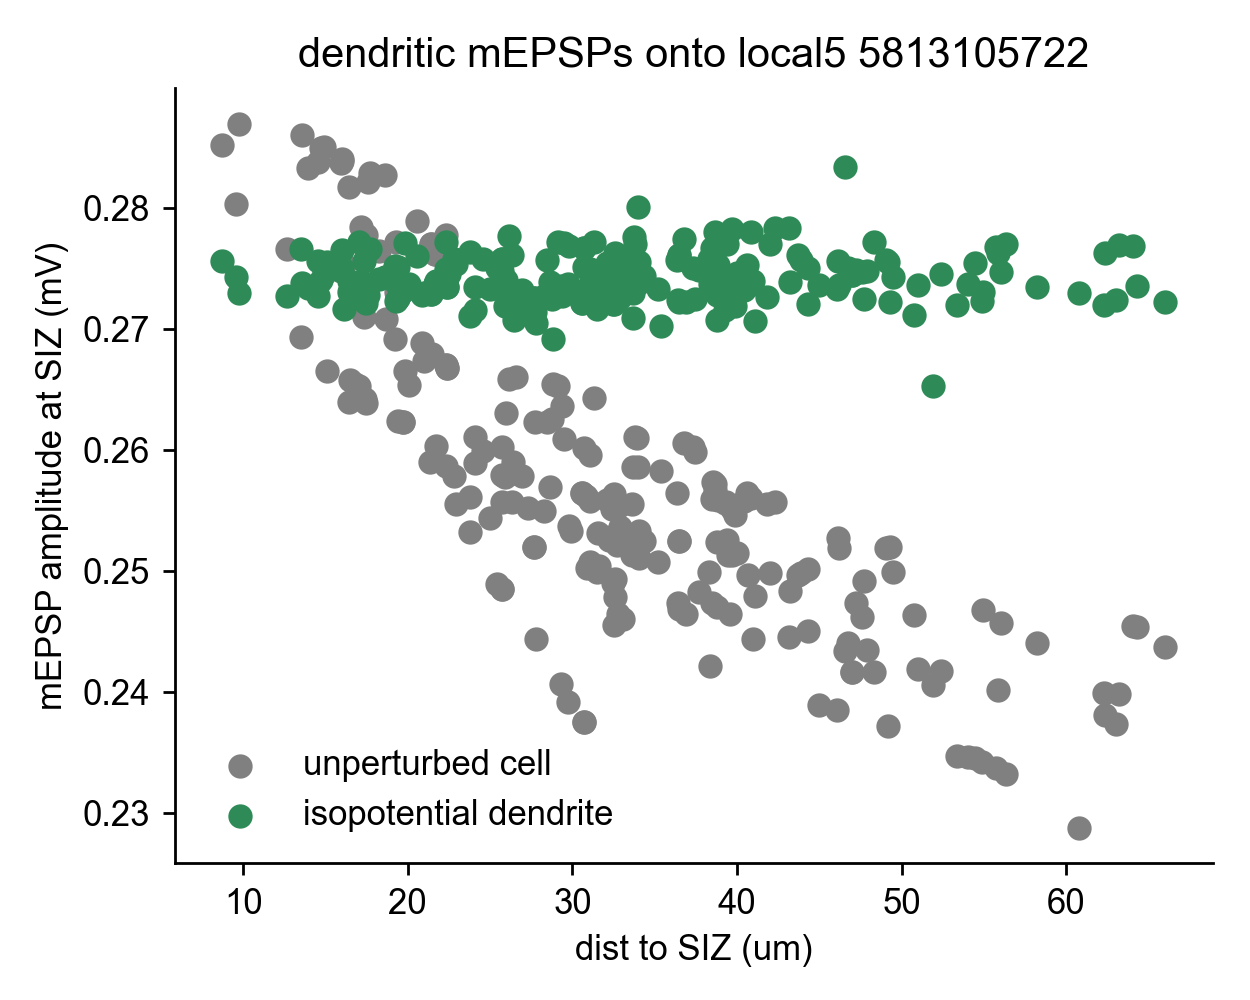

In [14]:
%matplotlib notebook

fig, ax = plt.subplots(1,1, figsize=(5,4))

d_mEPSP_df_postI = mEPSP_df_postI.loc[mEPSP_df_postI.ax_v_dendr=='dendritic']
d_mEPSP_df_preI = mEPSP_df_preI.loc[mEPSP_df_preI.ax_v_dendr=='dendritic']

ax.scatter(d_mEPSP_df_preI.dist_to_siz, d_mEPSP_df_preI.mEPSP_siz, color = 'grey', label='unperturbed cell')
ax.scatter(d_mEPSP_df_postI.dist_to_siz, d_mEPSP_df_postI.mEPSP_siz, color = 'seagreen', label='isopotential dendrite')

ax.set(xlabel='dist to SIZ (um)', ylabel = 'mEPSP amplitude at SIZ (mV)', 
       title = f'dendritic mEPSPs onto {target_neuron} {target_body_id}')
ax.legend(frameon=False, loc='lower left')
ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False)
plt.tight_layout()

<IPython.core.display.Javascript object>


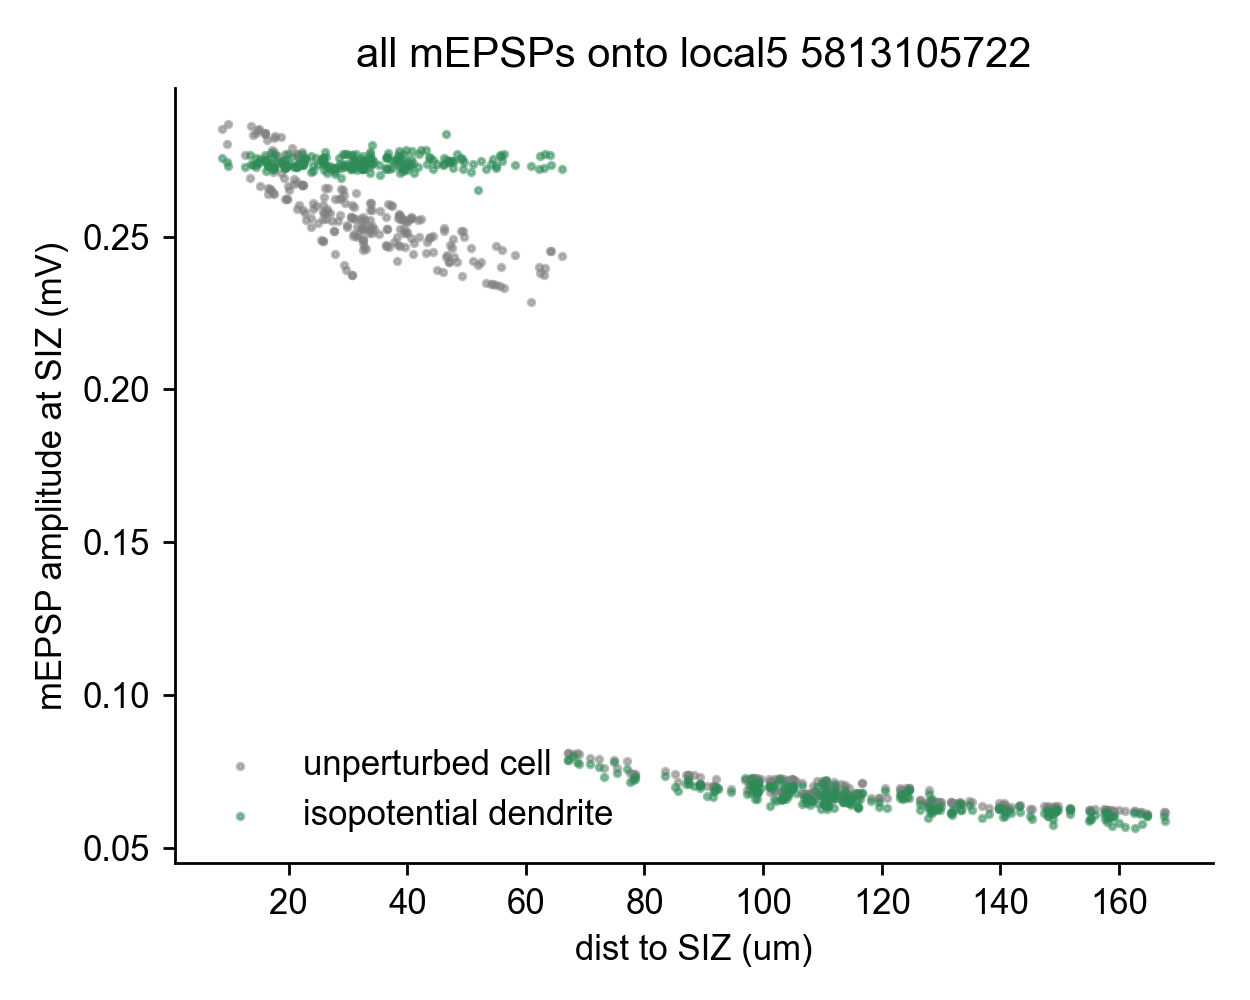

In [16]:
%matplotlib notebook

fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.scatter(mEPSP_df_preI.dist_to_siz, mEPSP_df_preI.mEPSP_siz, color = 'grey', label='unperturbed cell', 
           s=3, alpha=0.5)
ax.scatter(mEPSP_df_postI.dist_to_siz, mEPSP_df_postI.mEPSP_siz, color = 'seagreen', label='isopotential dendrite', 
           s=3, alpha=0.5)

ax.set(xlabel='dist to SIZ (um)', ylabel = 'mEPSP amplitude at SIZ (mV)', 
       title = f'all mEPSPs onto {target_neuron} {target_body_id}')
ax.legend(frameon=False, loc='lower left')
ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False)
plt.tight_layout()

### compare mEPSPs after making axonal arbor isopotential

In [3]:
mEPSP_df_preI = probe_mEPSPs(target_name = target_neuron, target_body_id = target_body_id, input_name = 'all_inputs',
                            siz_sec = siz_sec, siz_seg = siz_seg,
                            toPlot = False, isopot_ax_arbor = False)
mEPSP_df_postI = probe_mEPSPs(target_name = target_neuron, target_body_id = target_body_id, input_name = 'all_inputs',
                            siz_sec = siz_sec, siz_seg = siz_seg,
                            toPlot = False, isopot_ax_arbor = True)

importing local5 5813105722
One point section Import3d_Section[44] ending at line 75 has been removed
	and child Import3d_Section[45] reattached
	and child Import3d_Section[46] reattached
One point section Import3d_Section[1] ending at line 6 has been removed
	and child Import3d_Section[2] reattached
	and child Import3d_Section[39] reattached
fetching all input synapse locations >3 synapses
adding 479 synapses from all_inputs to local5; budget = 0.7002923976608187
proportion synapses in dendrite: 0.4592901878914405
probing mEPSP for synapse 1
probing mEPSP for synapse 21
probing mEPSP for synapse 41
probing mEPSP for synapse 61
probing mEPSP for synapse 81
probing mEPSP for synapse 101
probing mEPSP for synapse 121
probing mEPSP for synapse 141
probing mEPSP for synapse 161
probing mEPSP for synapse 181
probing mEPSP for synapse 201
probing mEPSP for synapse 221
probing mEPSP for synapse 241
probing mEPSP for synapse 261
probing mEPSP for synapse 281
probing mEPSP for synapse 301
probi

<IPython.core.display.Javascript object>


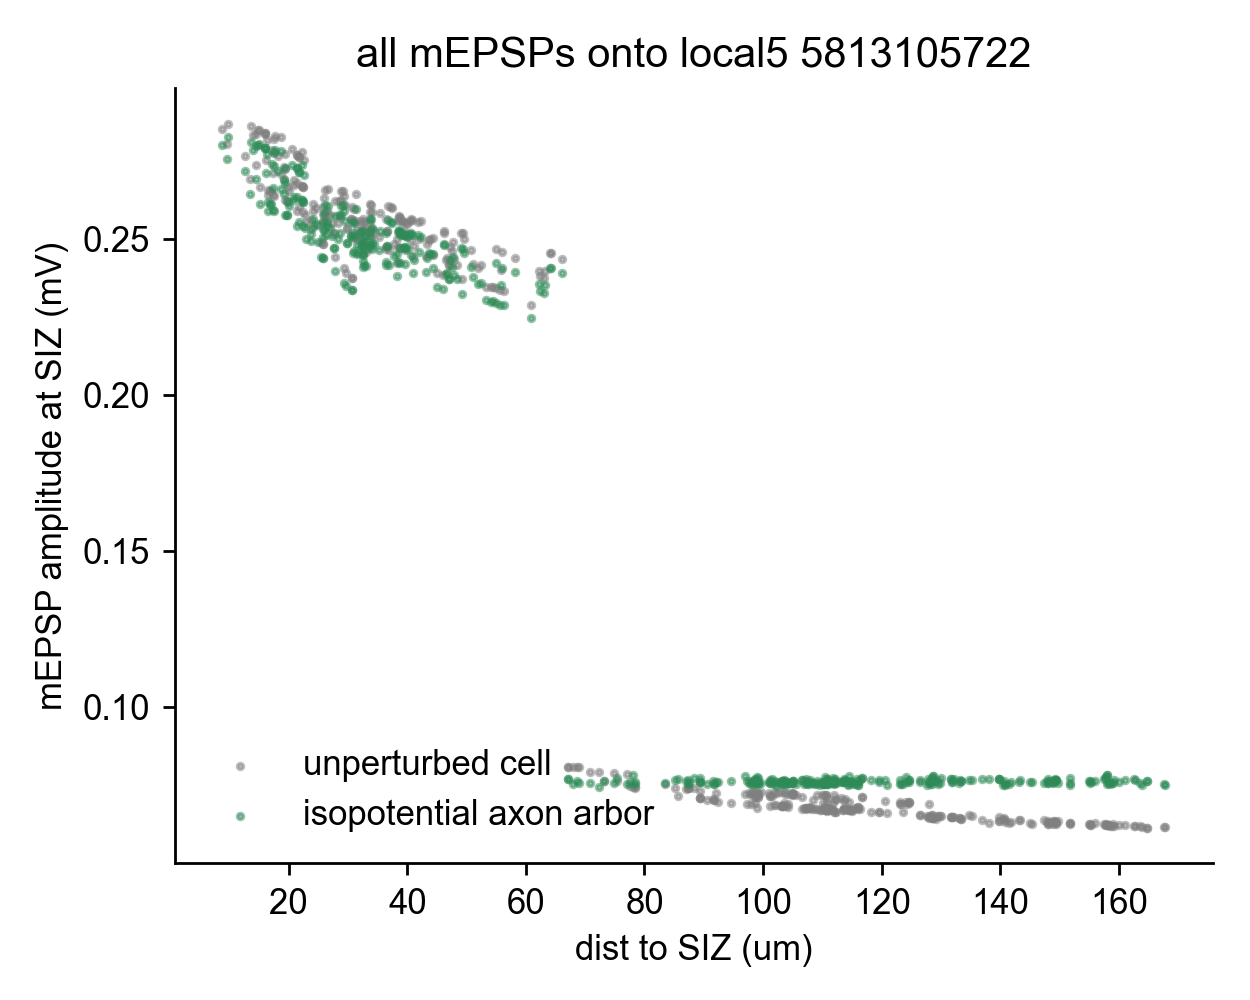

In [5]:
%matplotlib notebook

fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.scatter(mEPSP_df_preI.dist_to_siz, mEPSP_df_preI.mEPSP_siz, color = 'grey', label='unperturbed cell', 
           s=3, alpha=0.5)
ax.scatter(mEPSP_df_postI.dist_to_siz, mEPSP_df_postI.mEPSP_siz, color = 'seagreen', label='isopotential axon arbor', 
           s=3, alpha=0.5)

ax.set(xlabel='dist to SIZ (um)', ylabel = 'mEPSP amplitude at SIZ (mV)', 
       title = f'all mEPSPs onto {target_neuron} {target_body_id}')
ax.legend(frameon=False, loc='lower left')
ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False)
plt.tight_layout()

### compare mEPSPs after making PRIMARY AXON isopotential 

<IPython.core.display.Javascript object>


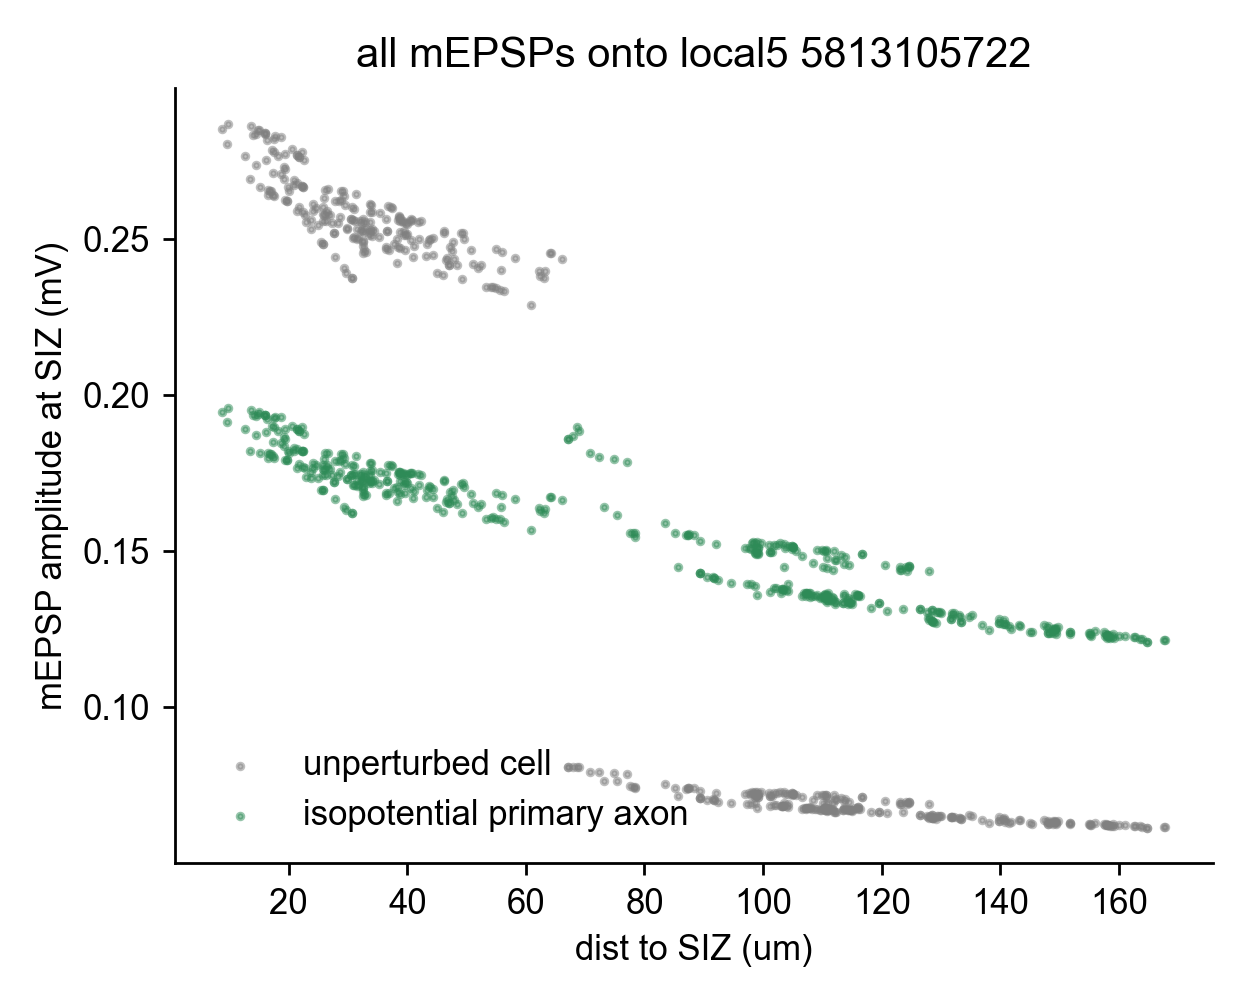

In [4]:
%matplotlib notebook

fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.scatter(mEPSP_df_preI.dist_to_siz, mEPSP_df_preI.mEPSP_siz, color = 'grey', label='unperturbed cell', 
           s=3, alpha=0.5)
ax.scatter(mEPSP_df_postI.dist_to_siz, mEPSP_df_postI.mEPSP_siz, color = 'seagreen', label='isopotential primary axon', 
           s=3, alpha=0.5)

ax.set(xlabel='dist to SIZ (um)', ylabel = 'mEPSP amplitude at SIZ (mV)', 
       title = f'all mEPSPs onto {target_neuron} {target_body_id}')
ax.legend(frameon=False, loc='lower left')
ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False)
plt.tight_layout()

### compare mEPSPs after making PRIMARY AXON high axial resistance 

In [3]:
mEPSP_df_preI = probe_mEPSPs(target_name = target_neuron, target_body_id = target_body_id, input_name = 'all_inputs',
                            siz_sec = siz_sec, siz_seg = siz_seg,
                            toPlot = False, highpot_prim_ax = False)
mEPSP_df_postI = probe_mEPSPs(target_name = target_neuron, target_body_id = target_body_id, input_name = 'all_inputs',
                            siz_sec = siz_sec, siz_seg = siz_seg,
                            toPlot = False, highpot_prim_ax = True)

importing local5 5813105722
One point section Import3d_Section[44] ending at line 75 has been removed
	and child Import3d_Section[45] reattached
	and child Import3d_Section[46] reattached
One point section Import3d_Section[1] ending at line 6 has been removed
	and child Import3d_Section[2] reattached
	and child Import3d_Section[39] reattached
fetching all input synapse locations >3 synapses
adding 479 synapses from all_inputs to local5; budget = 0.7002923976608187
proportion synapses in dendrite: 0.4592901878914405
probing mEPSP for synapse 1
probing mEPSP for synapse 21
probing mEPSP for synapse 41
probing mEPSP for synapse 61
probing mEPSP for synapse 81
probing mEPSP for synapse 101
probing mEPSP for synapse 121
probing mEPSP for synapse 141
probing mEPSP for synapse 161
probing mEPSP for synapse 181
probing mEPSP for synapse 201
probing mEPSP for synapse 221
probing mEPSP for synapse 241
probing mEPSP for synapse 261
probing mEPSP for synapse 281
probing mEPSP for synapse 301
probi

<IPython.core.display.Javascript object>


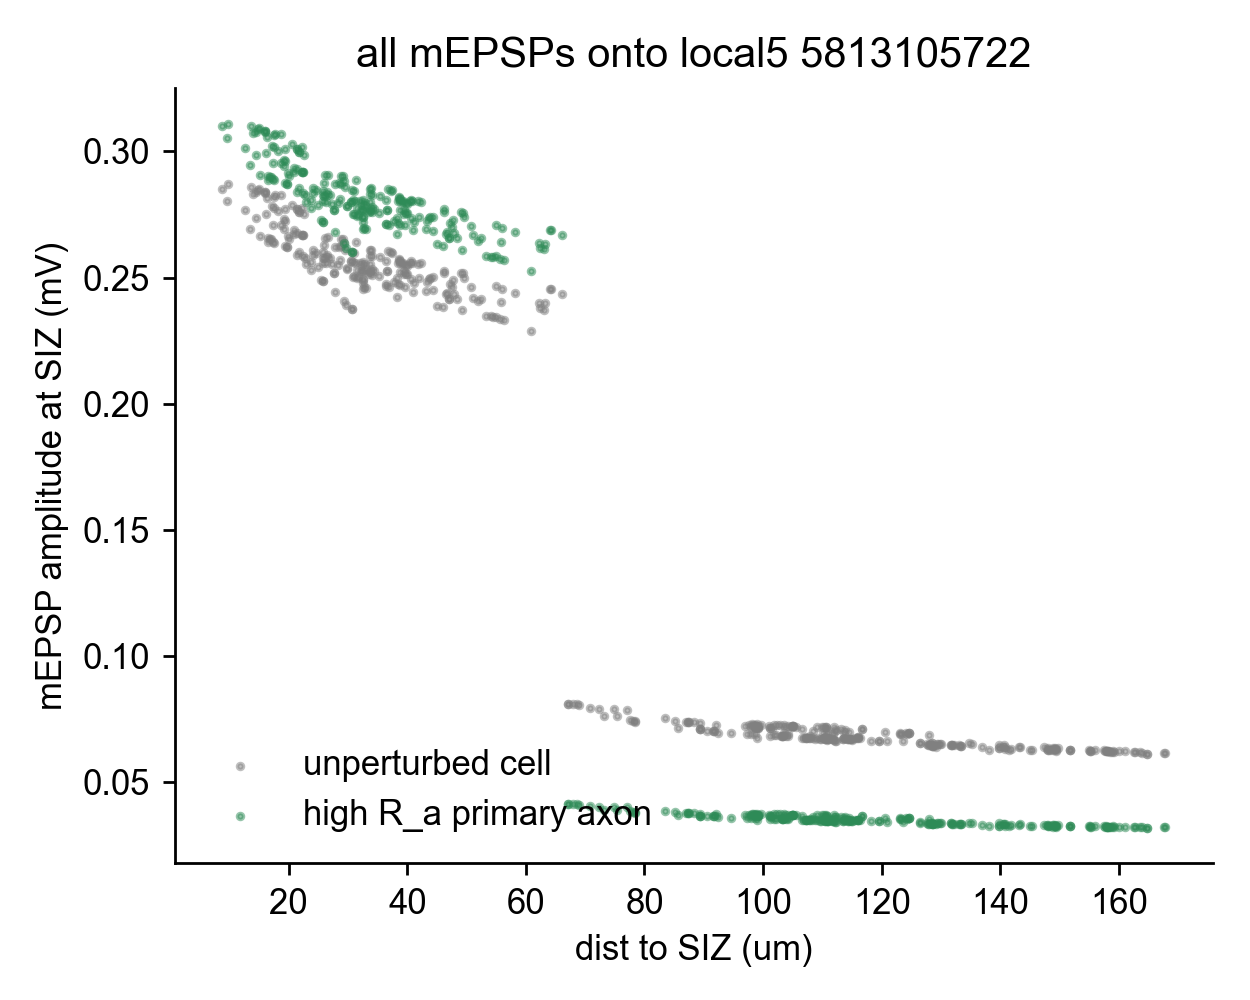

In [4]:
%matplotlib notebook

fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.scatter(mEPSP_df_preI.dist_to_siz, mEPSP_df_preI.mEPSP_siz, color = 'grey', label='unperturbed cell', 
           s=3, alpha=0.5)
ax.scatter(mEPSP_df_postI.dist_to_siz, mEPSP_df_postI.mEPSP_siz, color = 'seagreen', label='high R_a primary axon', 
           s=3, alpha=0.5)

ax.set(xlabel='dist to SIZ (um)', ylabel = 'mEPSP amplitude at SIZ (mV)', 
       title = f'all mEPSPs onto {target_neuron} {target_body_id}')
ax.legend(frameon=False, loc='lower left')
ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False)
plt.tight_layout()

### Compare summation efficacy before and after making dendrite isopotential

In [2]:
syn_info_VA6_preI = probe_mEPSPs(target_name = 'local5', target_body_id = 5813105722, input_name = 'VA6_adPN',
                    siz_sec = 996, siz_seg = 0.5,
                    toPlot = False, isopot_dendr_arbor = False)
syn_info_VL2a_preI = probe_mEPSPs(target_name = 'local5', target_body_id = 5813105722, input_name = 'VL2a_adPN',
                siz_sec = 996, siz_seg = 0.5,
                toPlot = False, isopot_dendr_arbor = False)

importing local5 5813105722
One point section Import3d_Section[44] ending at line 75 has been removed
	and child Import3d_Section[45] reattached
	and child Import3d_Section[46] reattached
One point section Import3d_Section[1] ending at line 6 has been removed
	and child Import3d_Section[2] reattached
	and child Import3d_Section[39] reattached
adding 107 synapses from VA6_adPN to local5; budget = 0.1564327485380117
proportion synapses in dendrite: 0.9345794392523364
probing mEPSP for synapse 1
probing mEPSP for synapse 21
probing mEPSP for synapse 41
probing mEPSP for synapse 61
probing mEPSP for synapse 81
probing mEPSP for synapse 101
soma summation efficacy: 0.6670007742865947
SIZ summation efficacy: 0.6563503406882177
importing local5 5813105722
One point section Import3d_Section[44] ending at line 75 has been removed
	and child Import3d_Section[45] reattached
	and child Import3d_Section[46] reattached
One point section Import3d_Section[1] ending at line 6 has been removed
	and chil

In [3]:
syn_info_VA6_postI = probe_mEPSPs(target_name = 'local5', target_body_id = 5813105722, input_name = 'VA6_adPN',
                    siz_sec = 996, siz_seg = 0.5,
                    toPlot = False, isopot_dendr_arbor = True)
syn_info_VL2a_postI = probe_mEPSPs(target_name = 'local5', target_body_id = 5813105722, input_name = 'VL2a_adPN',
                siz_sec = 996, siz_seg = 0.5,
                toPlot = False, isopot_dendr_arbor = True)

importing local5 5813105722
One point section Import3d_Section[44] ending at line 75 has been removed
	and child Import3d_Section[45] reattached
	and child Import3d_Section[46] reattached
One point section Import3d_Section[1] ending at line 6 has been removed
	and child Import3d_Section[2] reattached
	and child Import3d_Section[39] reattached
adding 107 synapses from VA6_adPN to local5; budget = 0.1564327485380117
proportion synapses in dendrite: 0.9345794392523364
setting dendritic arbor axial resistance to 0
probing mEPSP for synapse 1
probing mEPSP for synapse 21
probing mEPSP for synapse 41
probing mEPSP for synapse 61
probing mEPSP for synapse 81
probing mEPSP for synapse 101
soma summation efficacy: 0.6981152442814276
SIZ summation efficacy: 0.6976709138679305
importing local5 5813105722
One point section Import3d_Section[44] ending at line 75 has been removed
	and child Import3d_Section[45] reattached
	and child Import3d_Section[46] reattached
One point section Import3d_Section[